In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [3]:
df = df.loc[df['sqft_lot']<45000.00]

In [4]:
df['price'].mean()+3.5*df['price'].std()

1316471.2385767912

In [5]:
df = df.loc[df['price']<1350000.00]

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


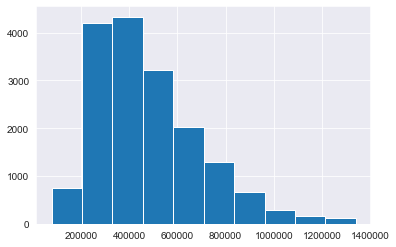

In [8]:
df['price'].hist()

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


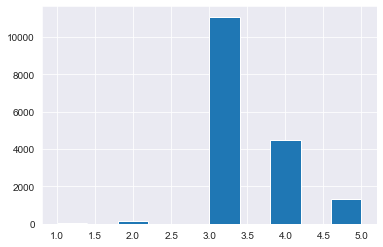

In [10]:
df['condition'].hist()

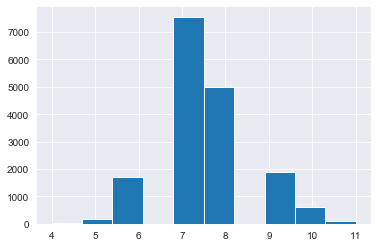

In [11]:
df['grade'].hist()

In [12]:
df['grade'].value_counts()

7     7557
8     4978
9     1873
6     1711
10     625
5      185
11     102
4       25
Name: grade, dtype: int64

In [13]:
df['waterfront'].value_counts()

0.0    17056
Name: waterfront, dtype: int64

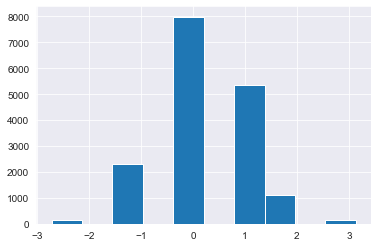

In [14]:
df['bedrooms'].hist()

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [16]:
# tomodel = ['grade','distance_from_a_city','basement','biggerliving','biggerlot','Years_last_renovation','view']

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [19]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [20]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [21]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','grade']
outcome = ['price']

In [22]:
train, test = train_test_split(df)


In [23]:
print(len(train), len(test))
train.head()

12792 4264


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,bedbath
13270,2014-10-15,795000.0,0.791862,1.022893,1.260910,0.566783,2.0,0.0,0.0,3,10,98077,-0.897582,-0.849937,0,0,0,-0.019889,1.407302,0.809990
15067,2014-06-11,234000.0,-0.378652,-0.061067,-0.423549,-0.397208,1.5,0.0,0.0,5,6,98002,2.051125,2.132806,0,1,0,2.062049,-0.512815,0.023123
14497,2015-02-11,900000.0,3.132891,1.384213,0.897067,-0.477851,1.0,0.0,0.0,3,7,98117,0.458145,0.521439,1,1,1,-0.729164,0.583658,4.336587
4900,2014-08-19,792000.0,0.791862,1.022893,1.543899,0.033323,2.0,0.0,0.0,3,10,98052,-0.965369,-0.918506,0,0,1,-0.435953,1.015767,0.809990
14363,2015-02-10,539950.0,-0.378652,0.300253,-0.127084,-0.719954,3.0,0.0,0.0,3,8,98103,-1.473767,-1.432772,0,1,0,-0.506236,0.809584,-0.113691


In [24]:
X = train[x_cols]
y = train['price']

In [25]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          3.000e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:22   Log-Likelihood:                     -1.6754e+05
No. Observations:               12792   AIC:                                  3.351e+05
Df Residuals:                   12784   BIC:                                  3.352e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.347e+04   1352.416     -9.958      0.000   -1.61e+04   -1.08e+04
bathrooms             1.933e+04   1731.686     11.162      0.000    1.59e+04    2.27e+04
sqft_living           1.007e+05   1730.104     58.199      0.000    9.73e+04    1.04e+05
sqft_lot              1.042e+04   1124.287      9.265      0.000    8212.411    1.26e+04
distance_from_a_city -1.011e+05   1153.088    -87.689      0.000   -1.03e+05   -9.89e+04
Age_of_House          3.576e+04   1397.675     25.584      0.000     3.3e+04    3.85e+04
basement             -2.303e+04   2276.911    -10.114      0.000   -2.75e+04   -1.86e+04
grade                 6.521e+04    177.274    367.839      0.000    6.49e+04    6.56e+04
==============================================================================
Omnibus:                     1456.085   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.211
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       5.151   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.347e+04,1352.416,-9.958,0.0,-1.61e+04,-1.08e+04
bathrooms,1.933e+04,1731.686,11.162,0.0,1.59e+04,2.27e+04
sqft_living,1.007e+05,1730.104,58.199,0.0,9.73e+04,1.04e+05
sqft_lot,1.042e+04,1124.287,9.265,0.0,8212.411,1.26e+04
distance_from_a_city,-1.011e+05,1153.088,-87.689,0.0,-1.03e+05,-9.89e+04


In [27]:
X = train[x_cols]
y= train['price']

In [28]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          3.000e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:23   Log-Likelihood:                     -1.6754e+05
No. Observations:               12792   AIC:                                  3.351e+05
Df Residuals:                   12784   BIC:                                  3.352e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.347e+04   1352.416     -9.958      0.000   -1.61e+04   -1.08e+04
bathrooms             1.933e+04   1731.686     11.162      0.000    1.59e+04    2.27e+04
sqft_living           1.007e+05   1730.104     58.199      0.000    9.73e+04    1.04e+05
sqft_lot              1.042e+04   1124.287      9.265      0.000    8212.411    1.26e+04
distance_from_a_city -1.011e+05   1153.088    -87.689      0.000   -1.03e+05   -9.89e+04
Age_of_House          3.576e+04   1397.675     25.584      0.000     3.3e+04    3.85e+04
basement             -2.303e+04   2276.911    -10.114      0.000   -2.75e+04   -1.86e+04
grade                 6.521e+04    177.274    367.839      0.000    6.49e+04    6.56e+04
==============================================================================
Omnibus:                     1456.085   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.211
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       5.151   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.664838831684881),
 ('bathrooms', 2.733843641894712),
 ('sqft_living', 2.6407057594970946),
 ('sqft_lot', 1.131895090582777),
 ('distance_from_a_city', 1.2101396104053066),
 ('Age_of_House', 1.7884941306606994),
 ('basement', 1.7696628099548788),
 ('grade', 1.6566620686275275)]

In [30]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

8 8


In [31]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          3.000e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:24   Log-Likelihood:                     -1.6754e+05
No. Observations:               12792   AIC:                                  3.351e+05
Df Residuals:                   12784   BIC:                                  3.352e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.347e+04   1352.416     -9.958      0.000   -1.61e+04   -1.08e+04
bathrooms             1.933e+04   1731.686     11.162      0.000    1.59e+04    2.27e+04
sqft_living           1.007e+05   1730.104     58.199      0.000    9.73e+04    1.04e+05
sqft_lot              1.042e+04   1124.287      9.265      0.000    8212.411    1.26e+04
distance_from_a_city -1.011e+05   1153.088    -87.689      0.000   -1.03e+05   -9.89e+04
Age_of_House          3.576e+04   1397.675     25.584      0.000     3.3e+04    3.85e+04
basement             -2.303e+04   2276.911    -10.114      0.000   -2.75e+04   -1.86e+04
grade                 6.521e+04    177.274    367.839      0.000    6.49e+04    6.56e+04
==============================================================================
Omnibus:                     1456.085   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.211
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       5.151   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          3.000e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:25   Log-Likelihood:                     -1.6754e+05
No. Observations:               12792   AIC:                                  3.351e+05
Df Residuals:                   12784   BIC:                                  3.352e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.347e+04   1352.416     -9.958      0.000   -1.61e+04   -1.08e+04
bathrooms             1.933e+04   1731.686     11.162      0.000    1.59e+04    2.27e+04
sqft_living           1.007e+05   1730.104     58.199      0.000    9.73e+04    1.04e+05
sqft_lot              1.042e+04   1124.287      9.265      0.000    8212.411    1.26e+04
distance_from_a_city -1.011e+05   1153.088    -87.689      0.000   -1.03e+05   -9.89e+04
Age_of_House          3.576e+04   1397.675     25.584      0.000     3.3e+04    3.85e+04
basement             -2.303e+04   2276.911    -10.114      0.000   -2.75e+04   -1.86e+04
grade                 6.521e+04    177.274    367.839      0.000    6.49e+04    6.56e+04
==============================================================================
Omnibus:                     1456.085   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.211
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       5.151   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

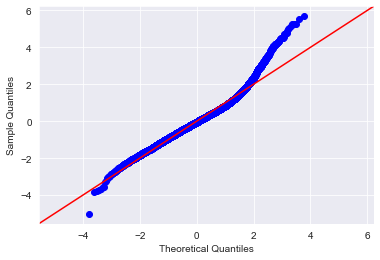

In [33]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


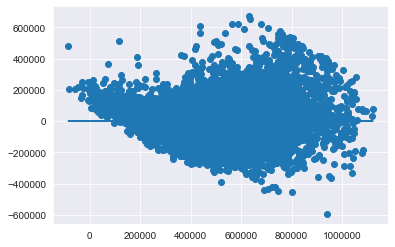

In [34]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

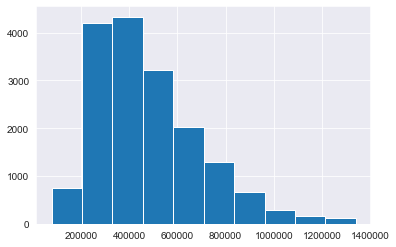

In [35]:
df.price.hist()

In [36]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 649000.0
0.81 percentile: 655775.0000000005
0.82 percentile: 669894.2
0.83 percentile: 680000.0
0.84 percentile: 695000.0
0.85 percentile: 705000.0
0.86 percentile: 720000.0
0.87 percentile: 735000.0
0.88 percentile: 750000.0
0.89 percentile: 765000.0
0.9 percentile: 780000.0
0.91 percentile: 800000.0
0.92 percentile: 820000.0
0.93 percentile: 844150.0000000014
0.94 percentile: 865000.0
0.95 percentile: 898597.0
0.96 percentile: 932951.9999999999
0.97 percentile: 980000.0
0.98 percentile: 1050000.0
0.99 percentile: 1190000.0


In [37]:
orig_tot = len(df)
df = df[df.price < 1100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
train, test = train_test_split(df)

Percent removed: 0.016651031894934335


In [38]:
X = train[x_cols]
y = train['price']

In [39]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.355e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:27   Log-Likelihood:                     -1.6350e+05
No. Observations:               12579   AIC:                                  3.270e+05
Df Residuals:                   12571   BIC:                                  3.271e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.201e+04   1236.657     -9.714      0.000   -1.44e+04   -9589.159
bathrooms             1.739e+04   1584.927     10.970      0.000    1.43e+04    2.05e+04
sqft_living           9.152e+04   1593.532     57.434      0.000    8.84e+04    9.46e+04
sqft_lot              1.192e+04   1022.349     11.657      0.000    9913.855    1.39e+04
distance_from_a_city -9.557e+04   1052.752    -90.779      0.000   -9.76e+04   -9.35e+04
Age_of_House          3.372e+04   1288.119     26.178      0.000    3.12e+04    3.62e+04
basement             -2.234e+04   2082.930    -10.725      0.000   -2.64e+04   -1.83e+04
grade                 6.421e+04    162.802    394.379      0.000    6.39e+04    6.45e+04
==============================================================================
Omnibus:                      553.842   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.498
Skew:                           0.353   Prob(JB):                    3.03e-216
Kurtosis:                       4.181   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.201e+04,1236.657,-9.714,0.0,-1.44e+04,-9589.159
bathrooms,1.739e+04,1584.927,10.970,0.0,1.43e+04,2.05e+04
sqft_living,9.152e+04,1593.532,57.434,0.0,8.84e+04,9.46e+04
sqft_lot,1.192e+04,1022.349,11.657,0.0,9913.855,1.39e+04
distance_from_a_city,-9.557e+04,1052.752,-90.779,0.0,-9.76e+04,-9.35e+04


In [41]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.355e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:28   Log-Likelihood:                     -1.6350e+05
No. Observations:               12579   AIC:                                  3.270e+05
Df Residuals:                   12571   BIC:                                  3.271e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.201e+04   1236.657     -9.714      0.000   -1.44e+04   -9589.159
bathrooms             1.739e+04   1584.927     10.970      0.000    1.43e+04    2.05e+04
sqft_living           9.152e+04   1593.532     57.434      0.000    8.84e+04    9.46e+04
sqft_lot              1.192e+04   1022.349     11.657      0.000    9913.855    1.39e+04
distance_from_a_city -9.557e+04   1052.752    -90.779      0.000   -9.76e+04   -9.35e+04
Age_of_House          3.372e+04   1288.119     26.178      0.000    3.12e+04    3.62e+04
basement             -2.234e+04   2082.930    -10.725      0.000   -2.64e+04   -1.83e+04
grade                 6.421e+04    162.802    394.379      0.000    6.39e+04    6.45e+04
==============================================================================
Omnibus:                      553.842   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.498
Skew:                           0.353   Prob(JB):                    3.03e-216
Kurtosis:                       4.181   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.66373100073868),
 ('bathrooms', 2.712055307823811),
 ('sqft_living', 2.6134140946827027),
 ('sqft_lot', 1.132628777143108),
 ('distance_from_a_city', 1.2088091060927226),
 ('Age_of_House', 1.811193357929755),
 ('basement', 1.755167878140606),
 ('grade', 1.655430701813613)]

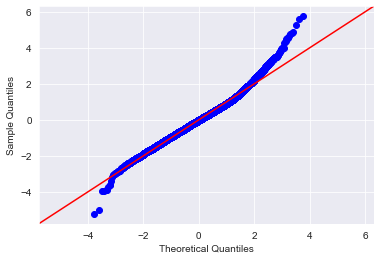

In [43]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


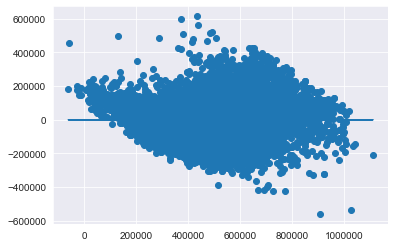

In [44]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 632500.0
0.81 percentile: 643729.5000000001
0.82 percentile: 650583.5999999997
0.83 percentile: 665000.0
0.84 percentile: 675000.0
0.85 percentile: 689175.0000000002
0.86 percentile: 700000.0
0.87 percentile: 715000.0
0.88 percentile: 727000.0
0.89 percentile: 742000.0
0.9 percentile: 755000.0
0.91 percentile: 775000.0
0.92 percentile: 790000.0
0.93 percentile: 809950.0
0.94 percentile: 830000.0
0.95 percentile: 850000.0
0.96 percentile: 875145.44
0.97 percentile: 909993.5
0.98 percentile: 950000.0
0.99 percentile: 998000.0


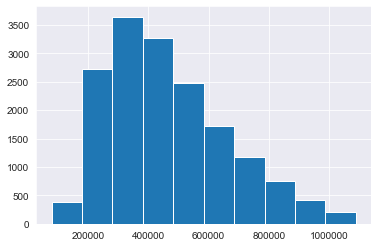

In [45]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [46]:
df = df[df.price <= 9250000]
train, test = train_test_split(df)

In [47]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.340e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        10:52:31   Log-Likelihood:                     -1.6358e+05
No. Observations:               12579   AIC:                                  3.272e+05
Df Residuals:                   12571   BIC:                                  3.272e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.343e+04   1255.755    -10.696      0.000   -1.59e+04    -1.1e+04
bathrooms             1.784e+04   1603.676     11.127      0.000    1.47e+04     2.1e+04
sqft_living           9.221e+04   1608.105     57.343      0.000    8.91e+04    9.54e+04
sqft_lot              1.056e+04   1012.935     10.429      0.000    8577.893    1.25e+04
distance_from_a_city -9.478e+04   1058.520    -89.544      0.000   -9.69e+04   -9.27e+04
Age_of_House          3.396e+04   1299.416     26.134      0.000    3.14e+04    3.65e+04
basement             -2.178e+04   2097.163    -10.388      0.000   -2.59e+04   -1.77e+04
grade                 6.429e+04    163.608    392.968      0.000     6.4e+04    6.46e+04
==============================================================================
Omnibus:                      510.666   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.782
Skew:                           0.349   Prob(JB):                    3.30e-187
Kurtosis:                       4.073   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

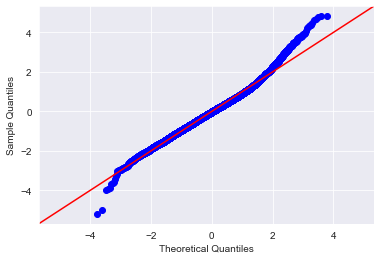

In [48]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


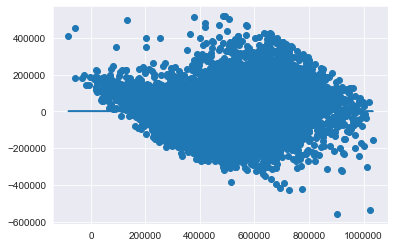

In [49]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [50]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [51]:
residuals = model.resid

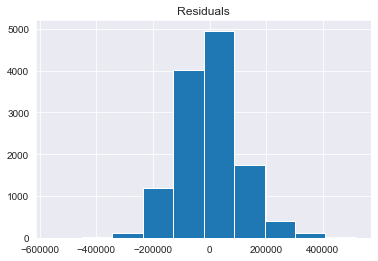

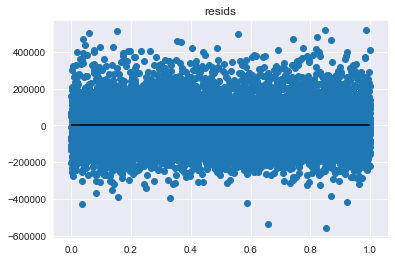

In [52]:
plot_residuals(residuals)

In [53]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [54]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [55]:
X_train = train[x_cols]
X_test = test[x_cols]

In [56]:
y_train = train['price']
y_test = test['price']

In [57]:
ols.fit(train[x_cols], train['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [58]:
ols.coef_

array([-13431.75855869,  17844.6114372 ,  92213.31229397,  10563.40117501,
       -94783.75022741,  33959.22851215, -21784.57611278,  64292.86928503])

In [59]:
ols.intercept_

0.0

In [60]:
y_train_preds = ols.predict(train[x_cols])
y_train_preds

array([320498.20979539, 197350.7964476 , 360115.54057806, ...,
       724299.56776536, 670659.19743406, 632261.85912075])

In [61]:
r2_score(train['price'], y_train_preds)

0.7079314842147872

In [62]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.7079314842147874

In [63]:
testing_score = ols.score(X_test, y_test)
testing_score

0.7049428669926519

In [64]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores

(0.7068101989300823, 0.7065897784234373, 0.7065897784234373)

In [65]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-82732.35427213236, -82714.8531330294, -82719.45364176999)

In [66]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

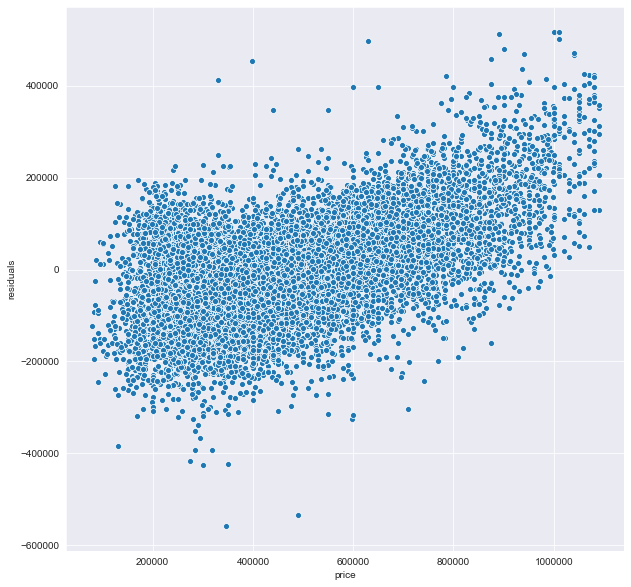

In [67]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)